<a href="https://colab.research.google.com/github/majorquev/Introduccion_a_ciencia_de_datos_R/blob/master/Clases/Clase5/Clase5_2_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 5: Clustering


**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Bastián Aballay Leiva<br>
**E-mail ayudante:** bastian.aballayleiva@gmail.com



Las los algoritmos de clustering corresponden a métodos no supervisados que buscan identificar estructuras de grupos dentro de un conjunto de datos. Dentro de los métodos más comunes, destacan aquellos basados en similitud, donde obervaciones que pertenecen a un mismo cluster son similares entre sí (grupos homogéneos), pero distintas a las observaciones de los otro clusters. 

Dentro de los distintos métodos destacan:


  * Enfoque de particiones 
    * K-means, k-medioids, CLARANS 
  * Enfoque jerárquico
    * Diana, Agnes, BIRCH, CAMELEON
  * Enfoque basado en densidad
    * DBSCAN, OPTICS, DenClue

A continuación se muestra la implementación de algunos de estos algoritmosen R, para mayor información refiérsa a la documentación de la clase y a las referencias citadas.




## Algoritmo k-means



In [ ]:

# K-Means
# Se define el nombre de la base de datos IRIS borrando la variable en donde 
# figura el verdadero nombre de la planta definida por cada fila

data(iris)
iris

dplyr::count(iris,Species)


In [ ]:
base <- iris
base$Species <- NULL
head(base)

In [4]:
# Se genera la clusterización con k medias con la siguiente estructura: 
# kmeans(datos, numero de clusters que se quiere obtener) # se recomienda nstart > 1

kmeans.resultado <- kmeans(base, centers = 3, nstart = 10 )



Hasta aquí llegó el algoritmo, pero algunas preguntas de interés que buscamos abordar a continuación.

* ¿Cómo podemos visualizar la clusterización realizada?
* ¿Que más podemos hacer además identificar los grupos generados? 
* ¿porqué escogimos 3 grupos? y ¿Cómo podemos  determinar el número óptimo de clusters?

In [8]:
str(kmeans.resultado)
kmeans.resultado$cluster

base$cl_kmens <- kmeans.resultado$cluster
base
dplyr::count(base,cl_kmens)


List of 9
 $ cluster     : int [1:150] 1 1 1 1 1 1 1 1 1 1 ...
 $ centers     : num [1:3, 1:4] 5.01 6.85 5.9 3.43 3.07 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ totss       : num 681
 $ withinss    : num [1:3] 15.2 23.9 39.8
 $ tot.withinss: num 78.9
 $ betweenss   : num 603
 $ size        : int [1:3] 50 38 62
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
[112] 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 2 2 2 3 2
[149] 2 3

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,cl_kmens
<dbl>,<dbl>,<dbl>,<dbl>,<int>
5.1,3.5,1.4,0.2,1
4.9,3.0,1.4,0.2,1
4.7,3.2,1.3,0.2,1
4.6,3.1,1.5,0.2,1
5.0,3.6,1.4,0.2,1
5.4,3.9,1.7,0.4,1
4.6,3.4,1.4,0.3,1
5.0,3.4,1.5,0.2,1
4.4,2.9,1.4,0.2,1


cl_kmens,n
<int>,<int>
1,50
2,38
3,62


In [9]:

kmeans.resultado$cluster # el cluster asignado a cada observación de base.
kmeans.resultado$centers


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
[112] 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 2 2 2 3 2
[149] 2 3

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053
3,5.901613,2.748387,4.393548,1.433871


            
              1  2  3
  setosa     50  0  0
  versicolor  0  2 48
  virginica   0 36 14

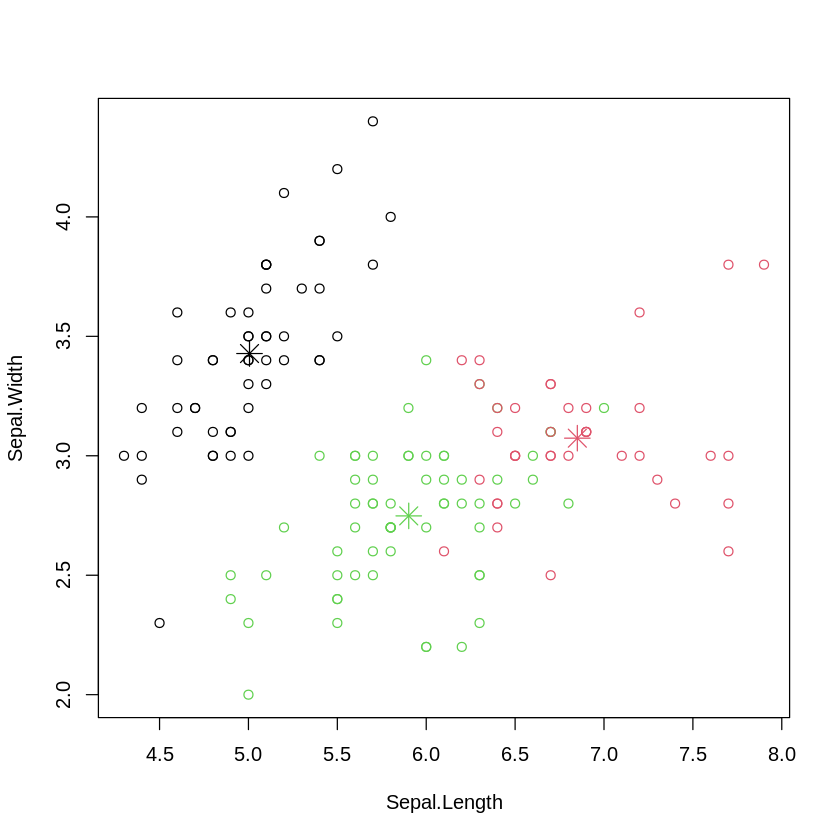

In [10]:

# Se contrasta la clasificacion real con la definida despues de la clusterizacion
table(iris$Species, kmeans.resultado$cluster)
plot(base[c("Sepal.Length", "Sepal.Width")], col = kmeans.resultado$cluster)
# Se grafica los centros de los clusters 
points(kmeans.resultado$centers[,c("Sepal.Length", "Sepal.Width")], col = 1:3, pch = 8, cex=2)




In [11]:
kmeans.resultado$centers

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053
3,5.901613,2.748387,4.393548,1.433871


In [14]:
library(dplyr)
base %>%
  group_by(cl_kmens) %>%
  summarise(sep_l = mean(Sepal.Length)
            ,sep_w = mean(Sepal.Width)
            ,pet_l = mean(Petal.Length)
            ,pet_w = mean(Petal.Width)
            )

`summarise()` ungrouping output (override with `.groups` argument)



cl_kmens,sep_l,sep_w,pet_l,pet_w
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053
3,5.901613,2.748387,4.393548,1.433871


In [17]:

# Se calcula la distancia entre cada observación y los centroides de los clusters

centroides <- kmeans.resultado$centers[kmeans.resultado$cluster, ]
head(centroides)
distancias <- sqrt(rowSums((base - centroides)^2))
distancias

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.006,3.428,1.462,0.246
1,5.006,3.428,1.462,0.246
1,5.006,3.428,1.462,0.246
1,5.006,3.428,1.462,0.246
1,5.006,3.428,1.462,0.246
1,5.006,3.428,1.462,0.246


[1] 4.008493 4.030932 4.027656 4.040299 4.010438 4.062809 4.027458 4.006547
  [9] 4.086565 4.023632 4.034949 4.014027 4.037179 4.108773 4.132362 4.183254
 [17] 4.059066 4.008593 4.089941 4.024875 4.032718 4.019455 4.056848 4.024229
 [25] 4.035495 4.031429 4.011436 4.011785 4.011535 4.026762 4.027309 4.028550
 [33] 4.069400 4.110233 4.021246 4.021295 4.040497 4.014227 4.077599 4.007645
 [41] 4.010289 4.195905 4.061480 4.024626 4.051027 4.034900 4.026961 4.033710
 [49] 4.026415 4.008792 3.150369 2.981175 4.955899 2.992408 2.971041 2.914090
 [57] 3.000643 3.305760 2.998438 3.026334 3.283142 2.919675 3.012124 2.928611
 [65] 3.030009 3.030115 2.930758 2.950667 2.970661 2.987823 2.987067 2.938398
 [73] 2.983393 2.934278 2.952525 2.995263 3.065203 4.923295 2.909936 3.077125
 [81] 3.027506 3.061254 2.954710 2.993000 2.958038 2.982041 3.046095 2.965988
 [89] 2.945799 2.969032 2.942347 2.926738 2.943005 3.288983 2.927123 2.935212
 [97] 2.922050 2.925415 3.343215 2.926903 4.911896 3.024628 4.859650 4.893754
[105] 4.865224 4.982695 3.092966 4.913235 4.893969 4.922814 4.906965 4.908091
[113] 4.856942 3.034796 3.140832 4.897839 4.876732 5.070180 5.085520 3.016939
[121] 4.857483 3.014961 5.024193 2.995155 4.857863 4.878620 2.968217 2.985392
[129] 4.880670 4.886274 4.904819 5.058696 4.882287 3.013997 4.977940 4.942766
[137] 4.905087 4.884442 2.965063 4.862465 4.865603 4.898000 3.024628 4.859867
[145] 4.876678 4.888428 3.037240 4.893808 4.921477 3.019237

In [18]:

# Se ordenan los registros con mayor distancia a sus respectivos centroides y se toman los top 5

outliers <- order(distancias, decreasing=T)[1:5]

# Cuales son los outliers

print(outliers)
print(base[outliers,])



[1] 119 118 132 123 106
    Sepal.Length Sepal.Width Petal.Length Petal.Width cl_kmens
119          7.7         2.6          6.9         2.3        2
118          7.7         3.8          6.7         2.2        2
132          7.9         3.8          6.4         2.0        2
123          7.7         2.8          6.7         2.0        2
106          7.6         3.0          6.6         2.1        2


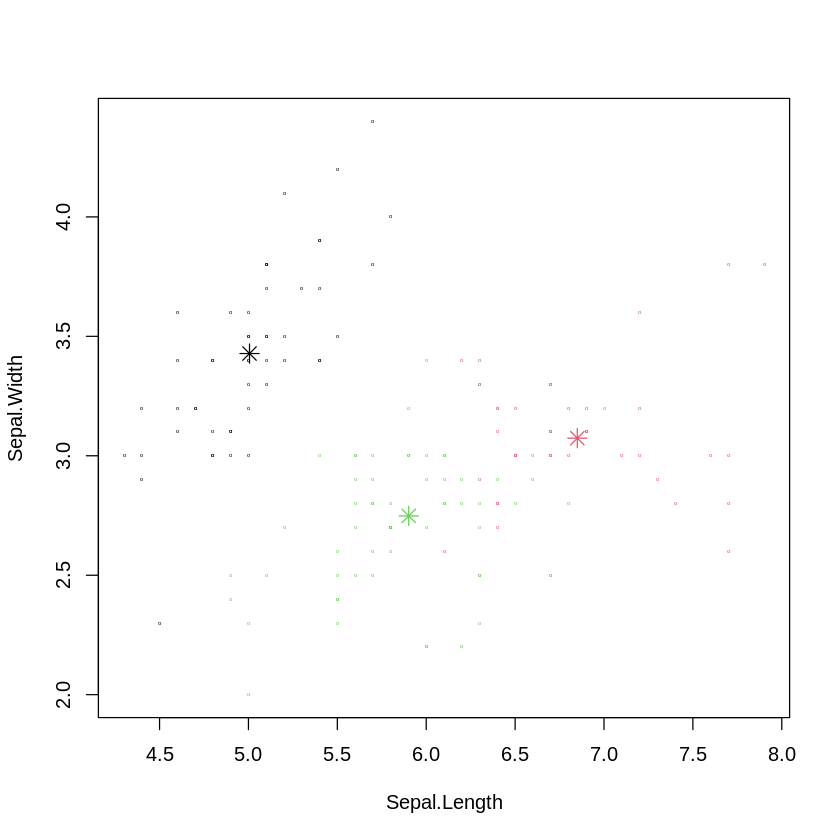

In [19]:
# Se grafican los clusters
plot(base[,c("Sepal.Length", "Sepal.Width")], pch="o", col=kmeans.resultado$cluster, cex=0.3)
#Se marcan los centroides de los clusters
points(kmeans.resultado$centers[,c("Sepal.Length", "Sepal.Width")], col=1:3, pch=8, cex=1.5)




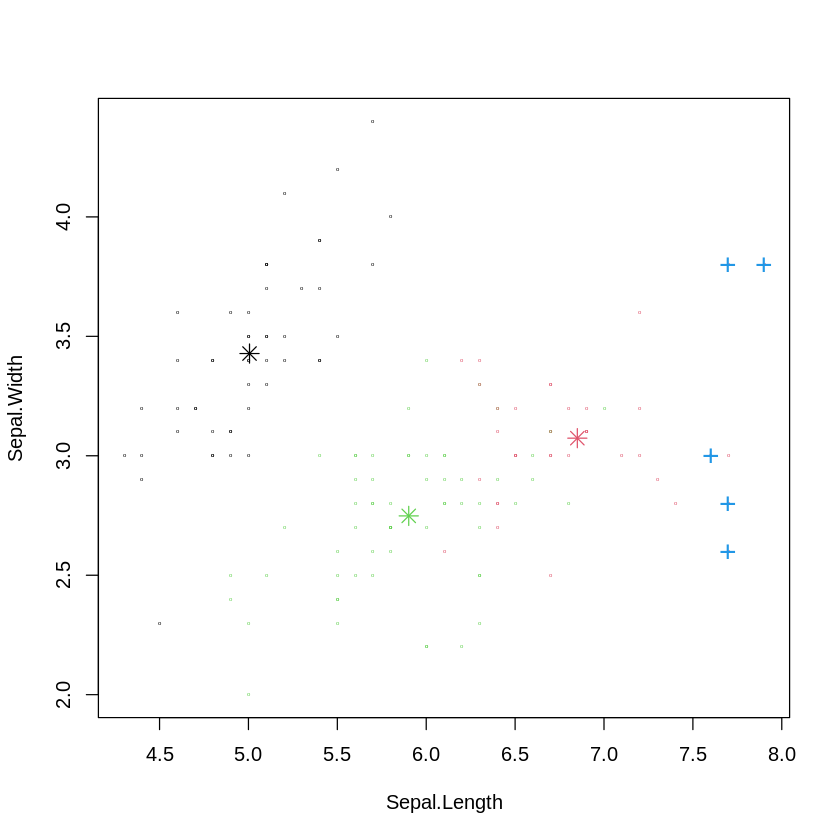

In [20]:
# Se grafican los outliers
plot(base[,c("Sepal.Length", "Sepal.Width")], pch="o", col=kmeans.resultado$cluster, cex=0.3)
points(kmeans.resultado$centers[,c("Sepal.Length", "Sepal.Width")], col=1:3, pch=8, cex=1.5)
points(base[outliers, c("Sepal.Length", "Sepal.Width")], pch="+", col=4, cex=1.5)


 ## Número de clusters

 Una de las opciones más utilizadas es la regla del "codo". Otra manera es estudiando el ancho de "silueta" de cada observación.

In [22]:
names(base)
base$cl_kmens <- NULL

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "cl_kmens"

In [23]:
names(base)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"

In [32]:
centros <- 2:50
twss_df <- data.frame()

for(k in centros){
 modelo <- kmeans(base,centers = k,nstart = 10)
 twss <- modelo$tot.withinss
 twss_df<- bind_rows(twss_df, data.frame(K = k, TWSS = twss))

}








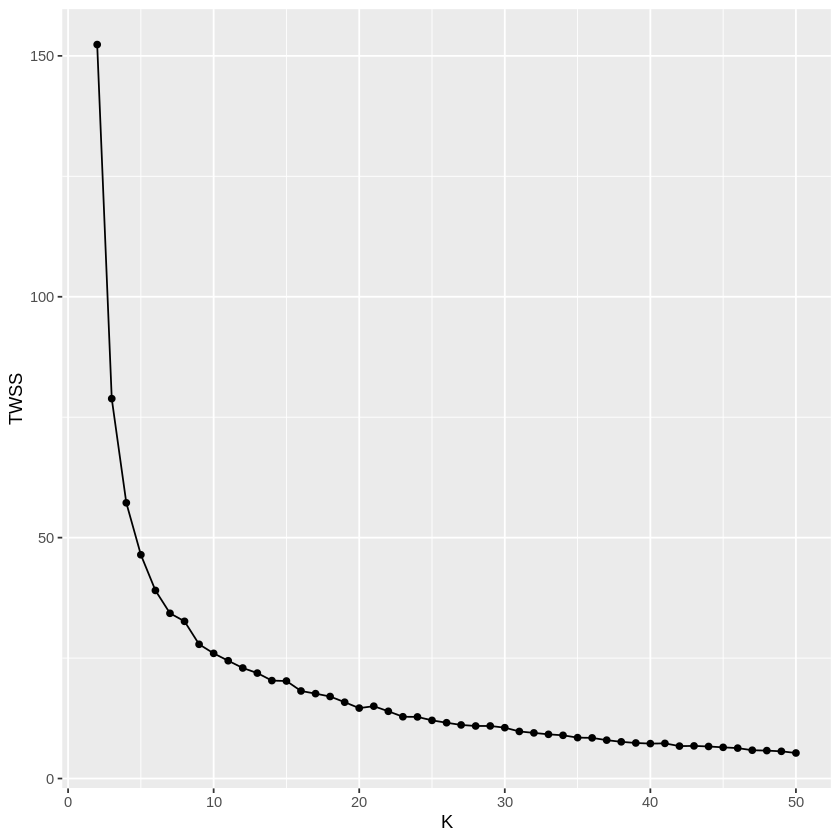

In [33]:
library(ggplot2)
twss_df %>%
  ggplot() +
  aes(x = K,y = TWSS) +
  geom_point() +
  geom_line()

In [34]:
modelo_final<- kmeans(base,centers = 4,nstart = 10)

In [35]:
base$cl_final <- modelo_final$cluster
modelo_final$size

[1] 50 28 32 40

## NOTA: Escalar datos 

In [36]:
base2 <- base[,-5]


In [38]:
base2 <- scale(base2)

In [39]:
base2

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
-0.89767388,1.01560199,-1.335752,-1.3110521
-1.13920048,-0.13153881,-1.335752,-1.3110521
-1.38072709,0.32731751,-1.392399,-1.3110521
-1.50149039,0.09788935,-1.279104,-1.3110521
-1.01843718,1.24503015,-1.335752,-1.3110521
-0.53538397,1.93331463,-1.165809,-1.0486668
-1.50149039,0.78617383,-1.335752,-1.1798595
-1.01843718,0.78617383,-1.279104,-1.3110521
-1.74301699,-0.36096697,-1.335752,-1.3110521
-1.13920048,0.09788935,-1.279104,-1.4422448


In [40]:
centros <- 2:50
twss_df <- data.frame()

for(k in centros){
 modelo <- kmeans(base2,centers = k,nstart = 10)
 twss <- modelo$tot.withinss
 twss_df<- bind_rows(twss_df, data.frame(K = k, TWSS = twss))

}


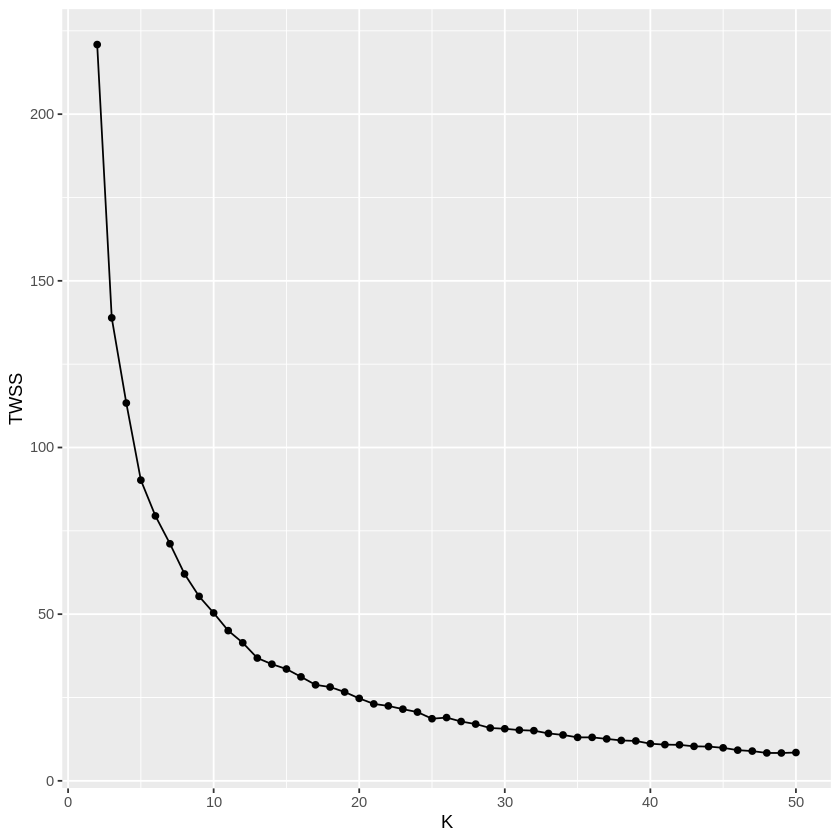

In [41]:

twss_df %>%
  ggplot() +
  aes(x = K,y = TWSS) +
  geom_point() +
  geom_line()

# Cluster jerárquico


In [ ]:
library(ggplot2)
## Clústers  jerárquicos
muestraIris <- iris
muestraIris$Species <- NULL


## Cluster aglomerativo
# Se genera el cluster aglomerativo con linkage completo.

hc <- hclust(dist(muestraIris), method="average")


In [ ]:

plot(hc, 
     hang   = -1, #posición inicio dendograma
     labels = iris$Species,
     cex    = .6)



In [ ]:

# Finalmente  se corta el dendograma en K clusters
K <- 5

plot(hc, hang = -1, labels=iris$Species)
rect.hclust(hc, k=K)


In [ ]:
groups <- cutree(hc, k=K)

plot(iris[,c("Sepal.Length", "Sepal.Width")], col = groups)



In [ ]:

# gráfico de siluetas  ----------------------------------------------------
plot(cluster::silhouette(groups,dist(muestraIris))) 

sil <- cluster::silhouette(groups,dist(muestraIris))


str(sil)
mean(sil[,3])

## DBSCAN

In [ ]:
#install.packages("dbscan")
#install.packages("mlbench")

In [ ]:
library(dbscan)
library(mlbench)

In [ ]:
# iris --------------------------------------------------------------------
data(iris)
iris <- as.matrix(iris[,1:4])

## find suitable eps parameter using a k-NN plot for k = dim + 1
## Look for the knee!

minPts <- 4+1

kNNdistplot(iris, k = minPts)
abline(h=.6, col = "red", lty=2)



In [ ]:
###### Es lo mismo que 
sort(kNNdist(iris, k = minPts)) -> distancias_knn

plot(distancias_knn,type = "l")
abline( h =.6, col = "red", lty=2)
######


In [ ]:
res <- dbscan(iris, eps = .4, minPts = minPts)
res

pairs(iris, col = res$cluster + 1L)



In [ ]:
# espiral -----------------------------------------------------------------
set.seed(666)
spiral <- mlbench.spirals(6000, 1, sd = 0.06)
spiral <- cbind(spiral$x, label = spiral$classes)
colnames(spiral)[c(1, 2)] <- c("x1", "x2")
spiral <- as.data.frame(spiral)
spiral$label <- factor(spiral$label)



ggplot(spiral) + 
  aes(x = x1, y = x2) + 
  geom_point()


In [ ]:
minPts <- 6

kNNdistplot(spiral[,1:2], k = minPts)
#abline(h=.04, col = "red", lty = 2)



In [ ]:
eps <- 0.04

res_spiral <- dbscan(spiral[,1:2], eps = eps, minPts = minPts)
res_spiral



In [ ]:
res_spiral$cluster

spiral2 <- spiral 

spiral2$cl <- res_spiral$cluster #== 0L



In [ ]:

ggplot(spiral2) + 
  aes(x = x1, y = x2, color = as.factor(cl) ) + 
  geom_point()

## OPTICS

In [ ]:
set.seed(2)
n <- 400

x <- cbind(
  x = runif(4, 0, 1) + rnorm(n, sd=0.1),
  y = runif(4, 0, 1) + rnorm(n, sd=0.1)
)

plot(x, col=rep(1:4, time = 100))


In [ ]:

### run OPTICS (Note: we use the default eps calculation)
res <- optics(x, minPts = 5)
res




In [ ]:
### get order
res$order

### plot produces a reachability plot
plot(res)
abline(h = .05, col = "red", lty = 2)




In [ ]:

### extract a DBSCAN clustering by cutting the reachability plot at eps_cl
res2 <- extractDBSCAN(res, eps_cl = .054)
res2



In [ ]:
plot(res2)  ## black is noise


In [ ]:
hullplot(x, res2)


